<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('J:\\Mon Drive\\Data_Analyst_Florentin_Marrouard\\Projet 4   Réalisez une étude de santé publique avec R ou Python\\Ressources\BBD\\population.csv',sep= ",")
#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('J:\\Mon Drive\\Data_Analyst_Florentin_Marrouard\\Projet 4   Réalisez une étude de santé publique avec R ou Python\Ressources\\BBD\\dispo_alimentaire.csv',sep= ",")
#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('J:\\Mon Drive\\Data_Analyst_Florentin_Marrouard\\Projet 4   Réalisez une étude de santé publique avec R ou Python\\Ressources\BBD\\aide_alimentaire.csv',sep= ",")
#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('J:\\Mon Drive\\Data_Analyst_Florentin_Marrouard\\Projet 4   Réalisez une étude de santé publique avec R ou Python\\Ressources\\BBD\\sous_nutrition.csv',sep= ",")


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

print(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None


In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
#changement du nom de la colonne Valeur par Population
population["Population"] = population["Valeur"]*1000

In [7]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Valeur,Population
0,Afghanistan,2013,32269.589,32269589.0
1,Afghanistan,2014,33370.794,33370794.0
2,Afghanistan,2015,34413.603,34413603.0
3,Afghanistan,2016,35383.032,35383032.0
4,Afghanistan,2017,36296.113,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [8]:
#Afficher les dimensions du dataset
#Consulter le nombre de colonnes
print(dispo_alimentaire.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [9]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [10]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [11]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg

dispo_alimentaire["Autres Utilisations"] = dispo_alimentaire["Autres Utilisations"] * 1000000
dispo_alimentaire["Disponibilité intérieure"] = dispo_alimentaire["Disponibilité intérieure"] * 1000000
dispo_alimentaire["Exportations - Quantité"] = dispo_alimentaire["Exportations - Quantité"] * 1000000
dispo_alimentaire["Importations - Quantité"] = dispo_alimentaire["Importations - Quantité"] * 1000000
dispo_alimentaire["Nourriture"] = dispo_alimentaire["Nourriture"] * 1000000
dispo_alimentaire["Pertes"] = dispo_alimentaire["Pertes"] * 1000000
dispo_alimentaire["Production"] = dispo_alimentaire["Production"] * 1000000
dispo_alimentaire["Semences"] = dispo_alimentaire["Semences"] * 1000000
dispo_alimentaire["Traitement"] = dispo_alimentaire["Traitement"] * 1000000
dispo_alimentaire["Variation de stock"] = dispo_alimentaire["Variation de stock"] * 1000000
dispo_alimentaire["Aliments pour animaux"] = dispo_alimentaire["Aliments pour animaux"] * 1000000

In [12]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [13]:
#Afficher les dimensions du dataset
#Consulter le nombre de colonnes
print(aide_alimentaire.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB
None


In [14]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [15]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire =aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"})

In [16]:
#Multiplication de la colonne Valeur qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Aide_Alimentaire"] = aide_alimentaire["Valeur"]*1000

In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur,Aide_Alimentaire
0,Afghanistan,2013,Autres non-céréales,682,682000
1,Afghanistan,2014,Autres non-céréales,335,335000
2,Afghanistan,2013,Blé et Farin,39224,39224000
3,Afghanistan,2014,Blé et Farin,15160,15160000
4,Afghanistan,2013,Céréales,40504,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [18]:
#Afficher les dimensions du dataset
#Consulter le nombre de colonnes
print(sous_nutrition.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
None


In [19]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(70)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
65,Arménie,2017-2019,<0.1
66,Australie,2012-2014,NaN
67,Australie,2013-2015,NaN
68,Australie,2014-2016,NaN


In [20]:
#ConAnnée de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace({"<0.1" :0})
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [21]:
#ConAnnée de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
#Puis remplacement des NaN en 0
sous_nutrition = sous_nutrition.fillna(0)

In [22]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={"Valeur": "sous_nutrition"})

In [23]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"]*1000000

In [24]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [25]:
prop_sous_nutrition = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',["Zone", "sous_nutrition"]],
                               on='Zone')

In [26]:
prop_sous_nutrition["%sous_nutrition"]  = (prop_sous_nutrition["sous_nutrition"]*100) / prop_sous_nutrition["Population"]

In [27]:
prop_sous_nutrition.head()

,Zone,Population,sous_nutrition,%sous_nutrition
0,Afghanistan,36296113.0,10500000.0,28.928718
1,Afrique du Sud,57009756.0,3100000.0,5.437666
2,Albanie,2884169.0,100000.0,3.467203
3,Algérie,41389189.0,1300000.0,3.140917
4,Allemagne,82658409.0,0.0,0.000000


In [28]:
prop_sous_nutrition['sous_nutrition'].sum()

535700000.0

In [29]:
prop_sous_nutrition['Population'].sum()

7543798779.0

In [30]:
print("Proportion de personnes en état de sous nutrition au niveau mondial :", "{:.2f}".format(prop_sous_nutrition['sous_nutrition'].sum()*100/prop_sous_nutrition['Population'].sum()), "%")

Proportion de personnes en état de sous nutrition au niveau mondial : 7.10 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

Combien mange en moyenne un être humain ? Source => 

 Dans un régime alimentaire équilibré d'un adulte qui dépense 2 250 kcal/jour 

In [31]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
pays_pop = prop_sous_nutrition[['Zone', 'Population']]
pays_pop.head()

,Zone,Population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0


La disponibilité intérieure est égale à la somme :

Nourriture + Semences + Pertes + Alimentats pour animaux + Traitement + Autres utilisations (non alimentaires)

In [32]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [33]:
dispo_alim_pop = pd.merge(pays_pop, dispo_alimentaire, how='inner', on='Zone')

In [34]:
pop = pays_pop ["Population"].sum()
pop

7543798779.0

In [35]:
#Affichage du nouveau dataframe
dispo_alim_pop

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
15412,Zimbabwe,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
15413,Zimbabwe,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
15414,Zimbabwe,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [36]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alim_pop["dispo_kcal"] = dispo_alim_pop["Disponibilité alimentaire (Kcal/personne/jour)"]* dispo_alim_pop ["Population"]
dispo_alim_pop

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0,341678280.0
15412,Zimbabwe,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0,242022115.0
15413,Zimbabwe,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0,99656165.0
15414,Zimbabwe,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0,14236595.0


In [37]:
#Calcul du nombre d'humains pouvant être nourris
calcul_nb_humain_nourris_2017 =dispo_alim_pop["dispo_kcal"].sum() / 2250
print(calcul_nb_humain_nourris_2017)

9297326501.036


In [38]:
prop_nb_humain_nourri = (calcul_nb_humain_nourris_2017/pop)*100
prop_nb_humain_nourri

123.24462480252483

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [39]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alim_veg = dispo_alim_pop[dispo_alim_pop["Origine"]=="vegetale"]
dispo_alim_veg.head(50)

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+07,2000000.0,4.000000e+07,3.900000e+07,2000000.0,3.000000e+06,0.0,0.0,0.0,3.629611e+07
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+06,0.0,2.000000e+06,2.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,3.629611e+07
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,8.200000e+07,0.0,8.200000e+07,8.200000e+07,0.0,0.000000e+00,0.0,0.0,0.0,1.451845e+08
6,Afghanistan,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.000000e+06,0.0,3.000000e+06,3.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
7,Afghanistan,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,4.968938e+10
8,Afghanistan,36296113.0,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
9,Afghanistan,36296113.0,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
10,Afghanistan,36296113.0,Coco (Incl Coprah),vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
12,Afghanistan,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [40]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_alim_veg["dispo_kcal"].sum()

17260764211501.0

In [41]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
calcul_nb_humain_nourris_2017_vegetale =dispo_alim_veg["dispo_kcal"].sum() / 2250
print(calcul_nb_humain_nourris_2017_vegetale)

7671450760.667111


In [42]:
prop_nb_humain_nourri_vege = (pop/ calcul_nb_humain_nourris_2017_vegetale)*100
prop_nb_humain_nourri_vege

98.33601250076967

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [43]:
#Calcul de la disponibilité totale
dispo_total = dispo_alim_pop["Disponibilité intérieure"].sum()
dispo_total

9733927000000.0

In [44]:
dispo_alim_pop.columns

Index(['Zone', 'Population', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'dispo_kcal'],
      dtype='object')

In [45]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,
for various in ['Aliments pour animaux', 'Pertes', 'Nourriture',"Semences",'Traitement','Autres Utilisations']:
 print("Proportion",
       various,
       ": ",
       "{:.1f}".format(dispo_alim_pop[various].sum()*100/dispo_total),
       "%"
       )


Proportion Aliments pour animaux :  13.2 %
Proportion Pertes :  4.6 %
Proportion Nourriture :  49.4 %
Proportion Semences :  1.6 %
Proportion Traitement :  22.5 %
Proportion Autres Utilisations :  8.8 %


([<matplotlib.patches.Wedge at 0x19c316c4450>,
 [Text(0.9154079996212191, 0.4025272589893486, 'Aliments pour animaux'),
  Text(0.5628877617422996, 0.8265333433569054, 'Pertes'),
  Text(-0.8897923076392328, 0.45636569685510875, 'Nourriture'),
  Text(-0.42963728391066275, -0.9030015527527451, 'Semences'),
  Text(0.30722573710812445, -0.9516366672519347, 'Traitement'),
  Text(0.9621030785852928, -0.27268602123449953, 'Autres Utilisations')],
 [Text(0.5492447997727314, 0.24151635539360916, '13.2%'),
  Text(0.33773265704537975, 0.4959200060141432, '4.6%'),
  Text(-0.5338753845835397, 0.27381941811306526, '49.4%'),
  Text(-0.2577823703463976, -0.541800931651647, '1.6%'),
  Text(0.18433544226487467, -0.5709820003511609, '22.5%'),
  Text(0.5772618471511757, -0.1636116127406997, '8.8%')])

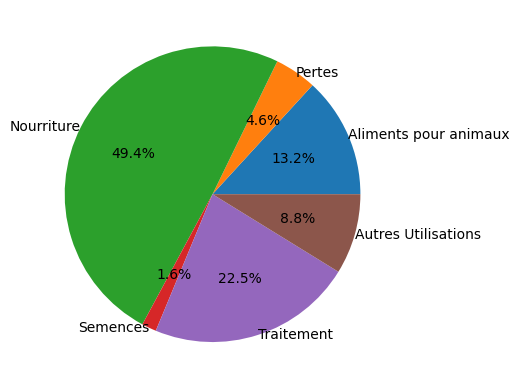

In [46]:
import matplotlib.pyplot as plt
labels = 'Aliments pour animaux', 'Pertes', 'Nourriture',"Semences",'Traitement','Autres Utilisations'
sizes = [13.2, 4.6, 49.4, 1.6,22.5,8.8]

fig, ax = plt.subplots()
ax.pie(sizes,
       labels=labels,
       autopct='%1.1f%%',
       labeldistance=1)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [47]:
dispo_alim_veg["Produit"].unique()

array(['Agrumes, Autres', 'Aliments pour enfants', 'Ananas', 'Bananes',
       'Bière', 'Blé', 'Boissons Alcooliques', 'Café',
       'Coco (Incl Coprah)', 'Céréales, Autres', 'Dattes',
       'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres',
       'Graines de coton', 'Graines de tournesol',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Légumes, Autres', 'Légumineuses Autres',
       'Maïs', 'Miel', 'Millet', 'Miscellanees', 'Noix', 'Olives',
       'Oranges, Mandarines', 'Orge', 'Plantes Oleiferes, Autre',
       'Poivre', 'Pommes', 'Pommes de Terre', 'Raisin',
       'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Sucre, betterave',
       'Sucre, canne', 'Sésame', 'Thé', 'Tomates', 'Vin',
       'Épices, Autres', 'Alcool, non Comestible',
       'Arachides Decortiquees', 'Avoine', 'Bananes plantains',
       'Bo

In [48]:
#Création d'une liste avec toutes les variables
listes_cereales = np.array(["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle",
                  "Avoine", "Millet", "Sorgho", "Céréales, Autres"], dtype=object)


In [49]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_alim_cereale = dispo_alim_cereale = dispo_alim_pop[dispo_alim_pop["Produit"].isin(listes_cereales)]
dispo_alim_cereale

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
7,Afghanistan,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,4.968938e+10
12,Afghanistan,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
32,Afghanistan,36296113.0,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,7.622184e+08
34,Afghanistan,36296113.0,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,1.088883e+08
40,Afghanistan,36296113.0,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,9.436989e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15374,Zimbabwe,14236595.0,Millet,vegetale,0.0,0.0,23.0,2.93,0.20,0.59,5.500000e+07,0.0,0.000000e+00,4.100000e+07,3000000.0,5.500000e+07,3000000.0,7000000.0,0.0,3.274417e+08
15382,Zimbabwe,14236595.0,Orge,vegetale,3000000.0,0.0,2.0,0.24,0.01,0.04,6.600000e+07,10000000.0,1.600000e+07,3.000000e+06,4000000.0,6.000000e+07,1000000.0,55000000.0,0.0,2.847319e+07
15399,Zimbabwe,14236595.0,Riz (Eq Blanchi),vegetale,0.0,0.0,101.0,10.09,0.19,1.90,1.580000e+08,1000000.0,1.560000e+08,1.430000e+08,0.0,0.000000e+00,0.0,15000000.0,2000000.0,1.437896e+09
15400,Zimbabwe,14236595.0,Seigle,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [50]:
print("Proportion d'alimentation animale :",
      "{:.2f}".format(dispo_alim_cereale['Aliments pour animaux'].sum()*100/dispo_alim_cereale['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation animale : 36.14 %


In [51]:
#Affichage de la proportion d'alimentation animale vs humaine 
for various in ['Aliments pour animaux', 'Nourriture']:
  print("Proportion",
        various, ":",
        "{:.1f}".format(dispo_alim_cereale[various].sum()*100/sum(dispo_alim_cereale['Disponibilité intérieure'])),"%")
  
  

Proportion Aliments pour animaux : 36.1 %
Proportion Nourriture : 42.9 %


([<matplotlib.patches.Wedge at 0x19c33a0e790>,
 [Text(0.14827584381289652, 1.0899606755023659, 'Aliments pour animaux'),
  Text(-0.14827574176341293, -1.0899606893849474, 'Nourriture')],
 [Text(0.08087773298885265, 0.5945240048194722, '45.7%'),
  Text(-0.08087767732549796, -0.5945240123917894, '54.3%')])

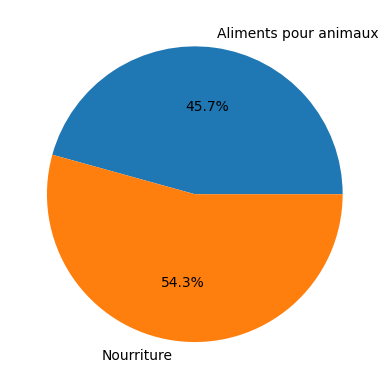

In [52]:
labels =['Aliments pour animaux', 'Nourriture']
sizes = [36.1,42.9]

fig, ax = plt.subplots()
ax.pie(sizes,
       labels=labels,
       autopct='%1.1f%%',)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [53]:
#Création de la colonne proportion par pays
prop_sous_nutrition.head()

,Zone,Population,sous_nutrition,%sous_nutrition
0,Afghanistan,36296113.0,10500000.0,28.928718
1,Afrique du Sud,57009756.0,3100000.0,5.437666
2,Albanie,2884169.0,100000.0,3.467203
3,Algérie,41389189.0,1300000.0,3.140917
4,Allemagne,82658409.0,0.0,0.000000


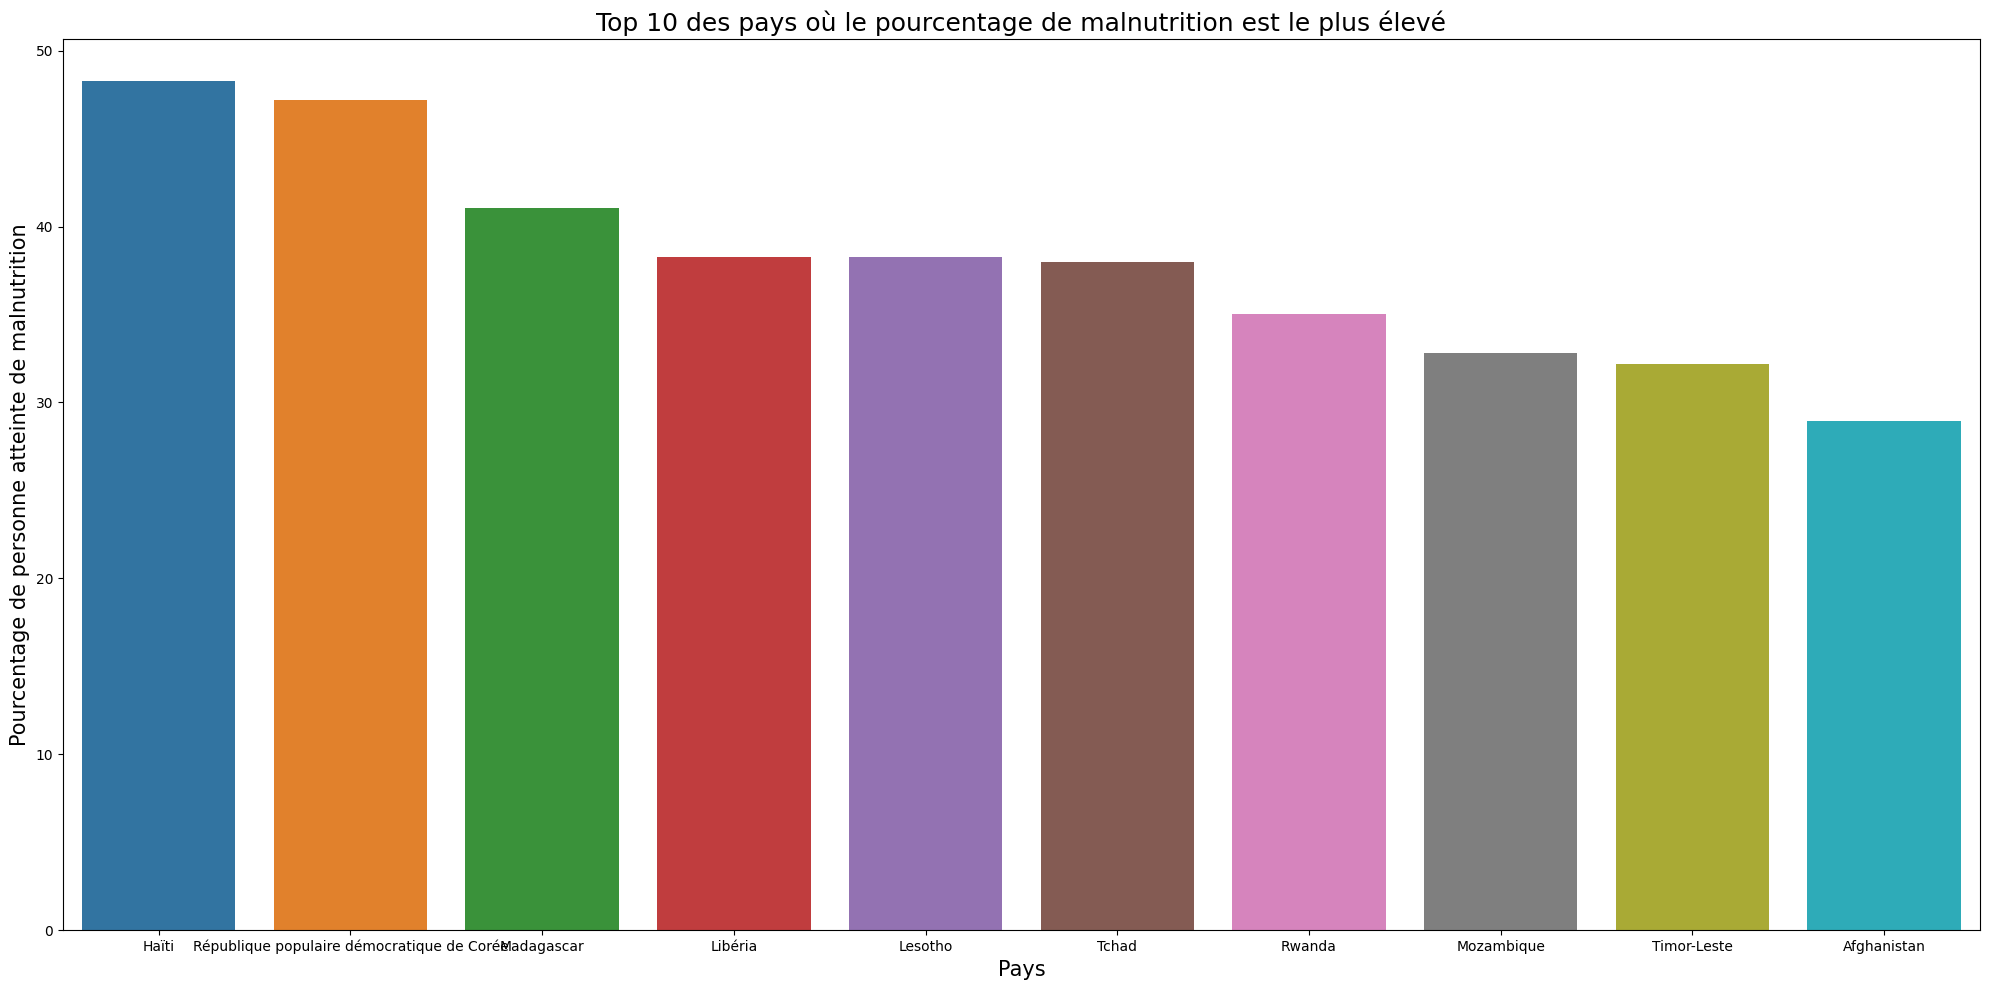

In [54]:
#affichage après trie des 10 pires pays
import seaborn as sns 
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))

sns.barplot(x='Zone', 
            y="%sous_nutrition", 
            data=prop_sous_nutrition, 
            order=prop_sous_nutrition.sort_values('%sous_nutrition',ascending = False).iloc[:10].Zone)

plt.xlabel("Pays", size=15)
plt.ylabel("Pourcentage de personne atteinte de malnutrition", size=15)
plt.title("Top 10 des pays où le pourcentage de malnutrition est le plus élevé", size=18)
plt.tight_layout()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [55]:
aide_alimentaire_total = aide_alimentaire.groupby(["Zone"]).sum()
aide_alimentaire_total.head()

C:\Users\flore\AppData\Local\Temp\ipykernel_19724\1209213624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aide_alimentaire_total = aide_alimentaire.groupby(["Zone"]).sum()


,Année,Valeur,Aide_Alimentaire
Zone,,,
Afghanistan,32216,185452,185452000
Algérie,78561,81114,81114000
Angola,8054,5014,5014000
Bangladesh,50347,348188,348188000
Bhoutan,24170,2666,2666000


In [56]:
#calcul du total de l'aide alimentaire par pays

tri_aide_alim= aide_alimentaire_total.sort_values(by='Aide_Alimentaire', ascending=False)
tri_aide_alim= tri_aide_alim.reset_index()
tri_aide_alim.head()


,Zone,Année,Valeur,Aide_Alimentaire
0,République arabe syrienne,76543,1858943,1858943000
1,Éthiopie,66460,1381294,1381294000
2,Yémen,76553,1206484,1206484000
3,Soudan du Sud,44309,695248,695248000
4,Soudan,48335,669784,669784000


In [57]:
tri_aide_alim = tri_aide_alim.loc[:,["Zone","Aide_Alimentaire"]]
tri_aide_alim.head(10)

,Zone,Aide_Alimentaire
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


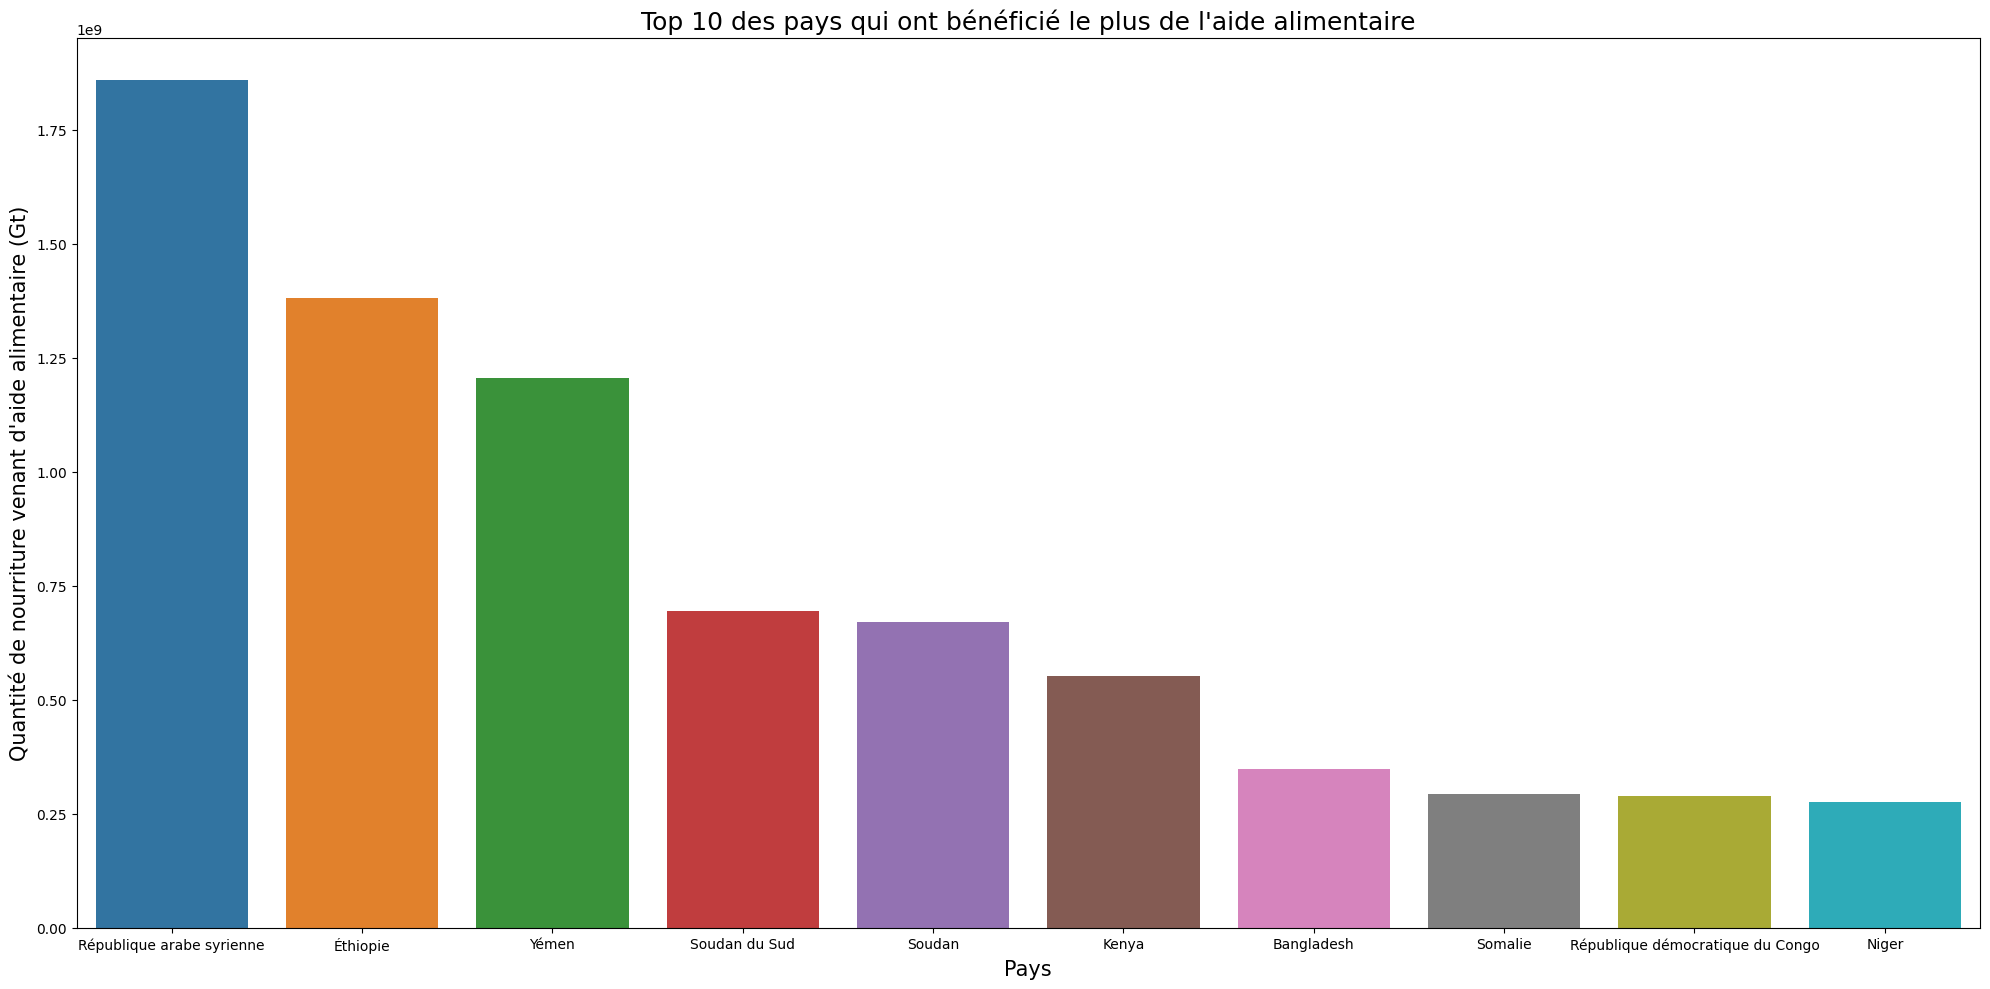

In [58]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
import seaborn as sns 
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))

sns.barplot(x='Zone', 
            y="Aide_Alimentaire", 
            data=tri_aide_alim, 
            order=tri_aide_alim.sort_values('Aide_Alimentaire',ascending = False).iloc[:10].Zone)

plt.xlabel("Pays", size=15)
plt.ylabel("Quantité de nourriture venant d'aide alimentaire (Gt)", size=15)
plt.title("Top 10 des pays qui ont bénéficié le plus de l'aide alimentaire", size=18)
plt.tight_layout()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [59]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_tri = aide_alimentaire.loc[(aide_alimentaire['Année'] >=2013) & (aide_alimentaire['Année'] <=2016),["Zone","Année", "Aide_Alimentaire"]]
aide_alimentaire_tri

,Zone,Année,Aide_Alimentaire
0,Afghanistan,2013,682000
1,Afghanistan,2014,335000
2,Afghanistan,2013,39224000
3,Afghanistan,2014,15160000
4,Afghanistan,2013,40504000
...,...,...,...
1470,Zimbabwe,2015,96000
1471,Zimbabwe,2013,5022000
1472,Zimbabwe,2014,2310000
1473,Zimbabwe,2015,306000


In [60]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

sum_aide_alim_year = aide_alimentaire_tri.groupby(["Zone","Année"]).sum().reset_index()
sum_aide_alim_year

,Zone,Année,Aide_Alimentaire
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [61]:
#On filtre sur le dataframe avec notre liste
listes_pays = np.array(["République arabe syrienne", "Éthiopie", "Soudan du Sud", "Yémen", "Soudan"], dtype=object)

In [62]:
# Affichage des pays avec l'aide alimentaire par année
tri_top_5 = aide_alimentaire_tri[aide_alimentaire_tri["Zone"].isin(listes_pays)]
sum_tri_top_5 = tri_top_5.groupby(["Zone","Année"]).sum().reset_index()
sum_tri_top_5.head(50)

,Zone,Année,Aide_Alimentaire
0,République arabe syrienne,2013,563566000
1,République arabe syrienne,2014,651870000
2,République arabe syrienne,2015,524949000
3,République arabe syrienne,2016,118558000
4,Soudan,2013,330230000
5,Soudan,2014,321904000
6,Soudan,2015,17650000
7,Soudan du Sud,2013,196330000
8,Soudan du Sud,2014,450610000
9,Soudan du Sud,2015,48308000


In [63]:
#Évolution de l’aide alimentaire pour les 5 pays qui en ont le plus bénéficié entre 2013 et 2016
import plotly.express as px
fig = px.bar(sum_tri_top_5,
             x="Année",
             y="Aide_Alimentaire",
             color="Zone",
             barmode='group',
             text_auto='.2s',
             
             )
fig.update_layout(xaxis={'categoryorder':'total ascending'})

fig.show()


In [64]:
sum_tri_top_5 = sum_tri_top_5.sort_values(by=['Année', 'Aide_Alimentaire'])

# Créer le graphique
fig = px.bar(sum_tri_top_5,
             x="Zone",
             y="Aide_Alimentaire",
             color="Année",
             text="Aide_Alimentaire",
             title="Evolution de l'aide alimentaire par pays (trié par ordre croissant)",
             labels={"Zone": "Pays", "Aide_Alimentaire": "Aide alimentaire en Gt"},
             barmode='group',
             text_auto='.2s',
             height=600,
             )

# Changer l'ordre des années sur l'axe X
fig.update_layout(xaxis={'categoryorder':'total ascending'})

# Afficher le graphique
fig.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [65]:
dispo_alim_pop.head()

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0


In [66]:
#Calcul de la disponibilité en kcal par personne par jour par pays
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_alim_pop_pays = dispo_alim_pop.groupby(["Zone"]).sum()
tri_dispo_alim = dispo_alim_pop_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).reset_index()
tri_dispo_alim = tri_dispo_alim.loc[:,["Zone",'Disponibilité alimentaire (Kcal/personne/jour)']]
tri_dispo_alim.head(20)

C:\Users\flore\AppData\Local\Temp\ipykernel_19724\1308068671.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

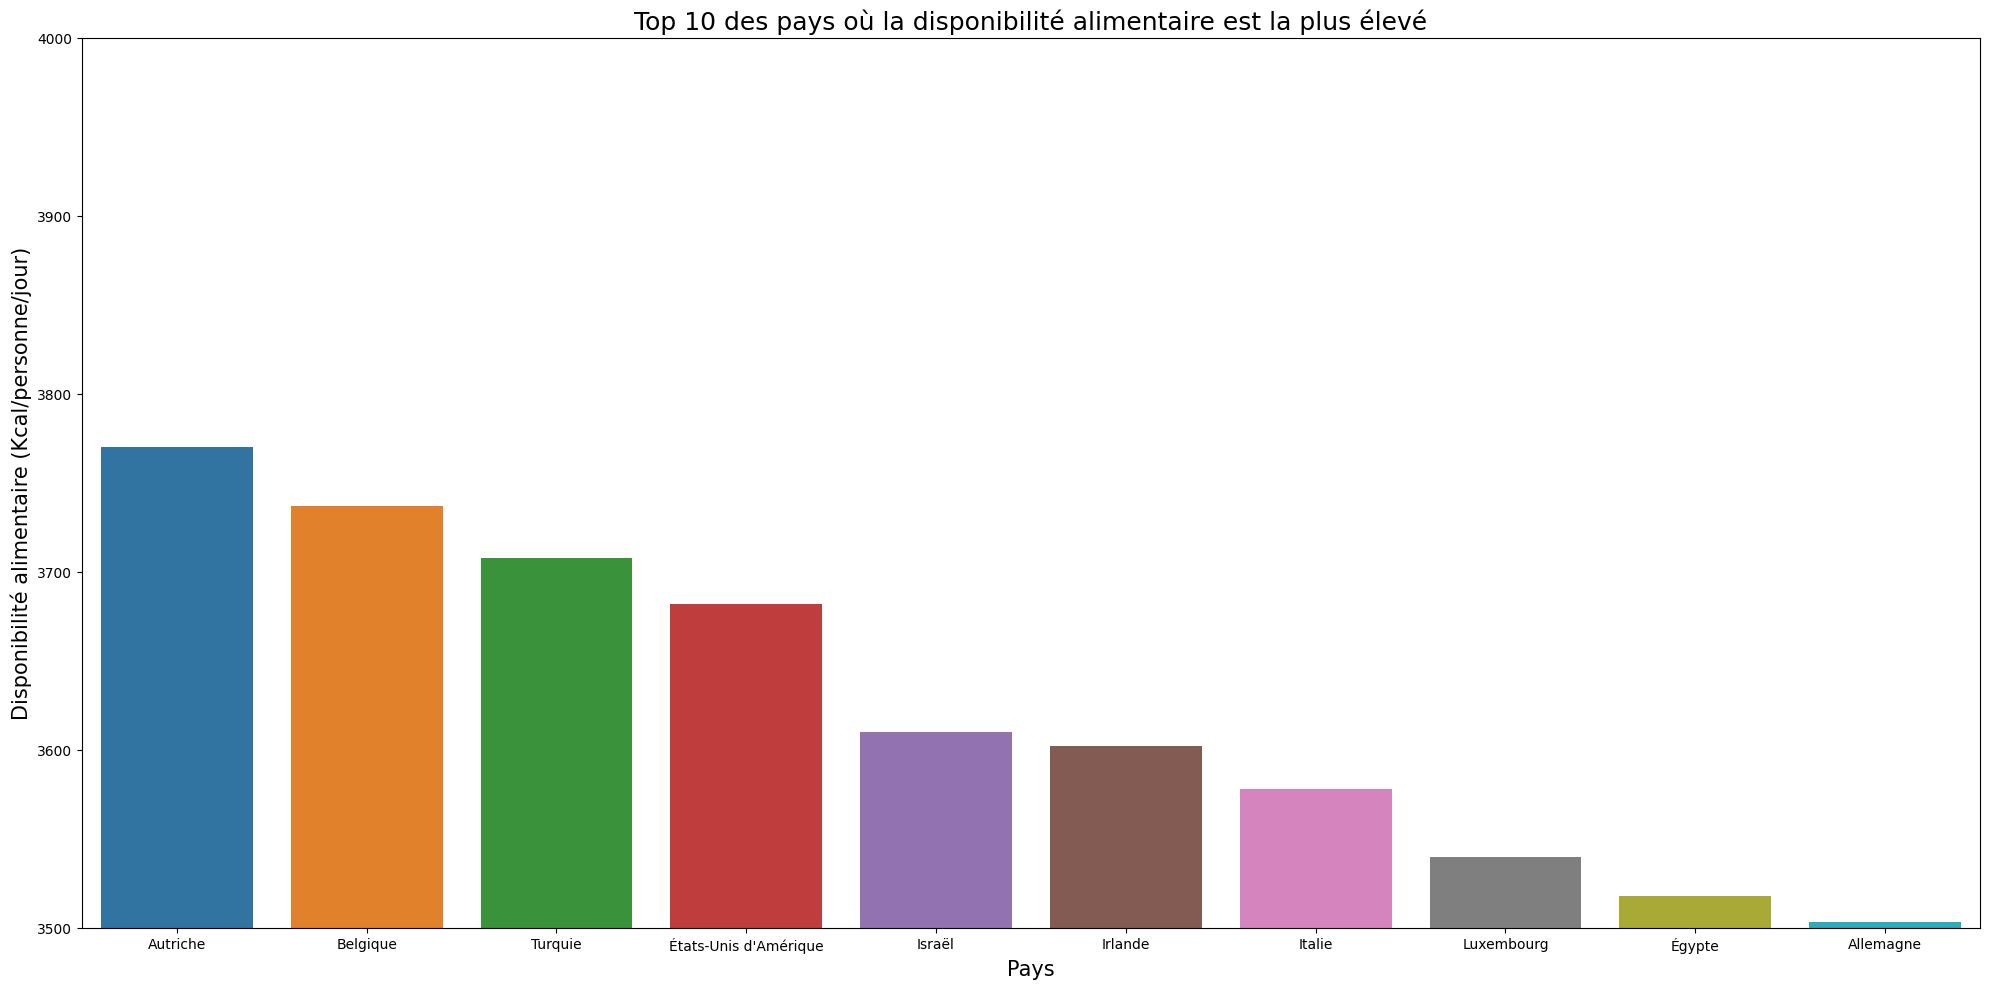

In [67]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

#affichage après trie des 10 pires pays
import seaborn as sns 
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))

sns.barplot(x='Zone', 
            y="Disponibilité alimentaire (Kcal/personne/jour)", 
            data=tri_dispo_alim, 
            order=tri_dispo_alim.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending = False).iloc[:10].Zone)

plt.xlabel("Pays", size=15)
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)", size=15)
plt.title("Top 10 des pays où la disponibilité alimentaire est la plus élevé", size=18)
plt.ylim([3500, 4000])
plt.tight_layout()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [68]:
#création d'un dataframe avec uniquement la Thaïlande 
sous_nutri_thai = prop_sous_nutrition[prop_sous_nutrition["Zone"]=="Thaïlande"]
sous_nutri_thai.head()

,Zone,Population,sous_nutrition,%sous_nutrition
185,Thaïlande,69209810.0,6200000.0,8.958268


In [69]:
dispo_manioc_thai = dispo_alim_pop.query("Zone == 'Thaïlande' & Produit == 'Manioc'")
dispo_manioc_thai.transpose()

,14166
Zone,Thaïlande
Population,69209810.0
Produit,Manioc
Origine,vegetale
Aliments pour animaux,1800000000.0
Autres Utilisations,2081000000.0
Disponibilité alimentaire (Kcal/personne/jour),40.0
Disponibilité alimentaire en quantité (kg/personne/an),13.0
Disponibilité de matière grasse en quantité (g/personne/jour),0.05
Disponibilité de protéines en quantité (g/personne/jour),0.14


In [70]:
prod_manioc = dispo_manioc_thai['Production'].sum()
export_manioc = dispo_manioc_thai['Exportations - Quantité'].sum()
dispo_interieur_manioc = dispo_manioc_thai['Disponibilité intérieure'].sum()
nourriture_humaine_manioc = dispo_manioc_thai['Nourriture'].sum()
aliment_animaux_manioc = dispo_manioc_thai['Aliments pour animaux'].sum()
sous_nutri_thai_texte = sous_nutri_thai["sous_nutrition"].sum()

In [71]:
# On calcule la proportion exportée en fonction de la proportion importé


In [72]:
print("La production de manioc est de", prod_manioc/100000, 'milliers de tonnes.')
print("La disponibilité intérieure de manioc", dispo_interieur_manioc/100000, 'milliers de tonnes, soit', round(dispo_interieur_manioc/prod_manioc*100,2),'% de la production')
print("L'export de manioc représente", export_manioc/1000000, 'milliers de tonnes, soit', round(export_manioc/prod_manioc*100,2),'% de la production')
print("En prenant le même ratio de 13 kg/pers/an, l'export de manioc permettrait de nourrir", round(export_manioc/365/13,2)/1000000, 'millions de personnes pendant 1 an')
print("La population en sous_nutrition est de",sous_nutri_thai_texte/1000000 , "millions d'habitants.")
print("=> On peut conclure que la Thaïlande fait trop d'exportation de manioc.")

La production de manioc est de 302280.0 milliers de tonnes.
La disponibilité intérieure de manioc 62640.0 milliers de tonnes, soit 20.72 % de la production
L'export de manioc représente 25214.0 milliers de tonnes, soit 83.41 % de la production
En prenant le même ratio de 13 kg/pers/an, l'export de manioc permettrait de nourrir 5.313804 millions de personnes pendant 1 an
La population en sous_nutrition est de 6.2 millions d'habitants.
=> On peut conclure que la Thaïlande fait trop d'exportation de manioc.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [73]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

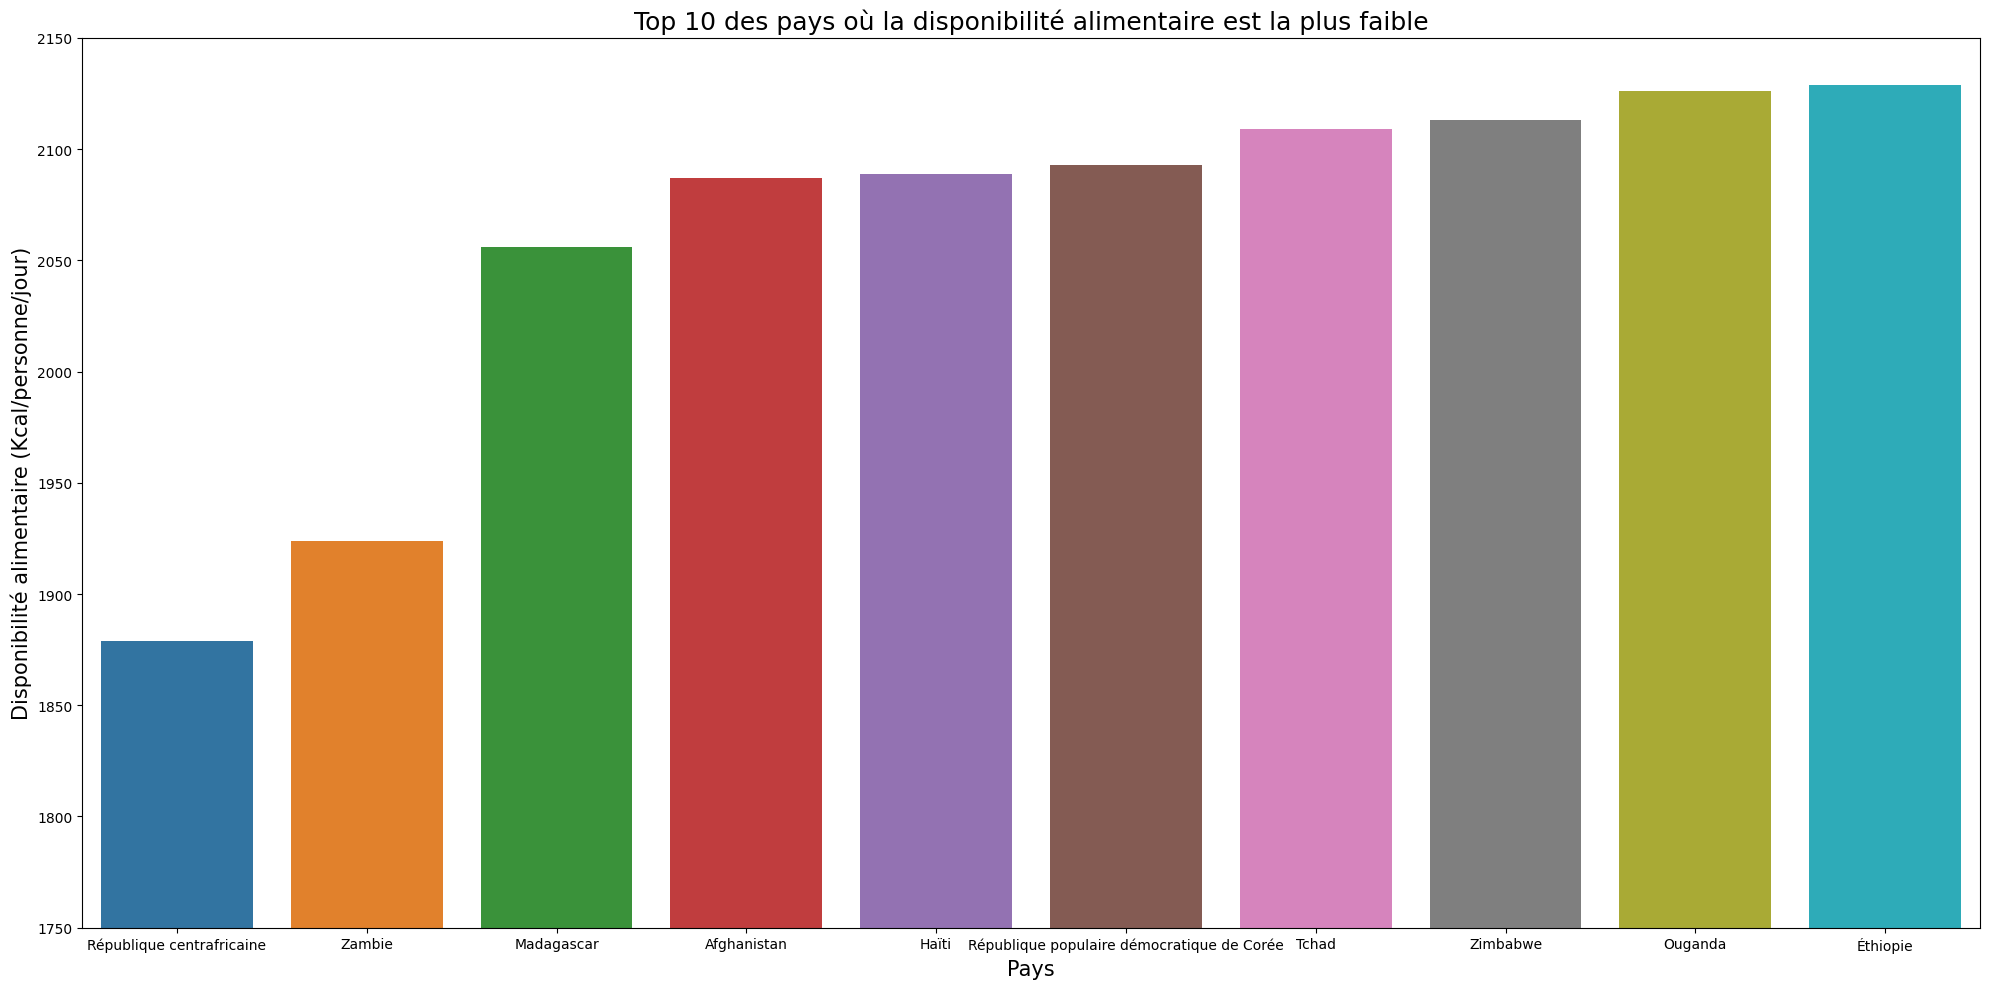

In [74]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

#affichage après trie des 10 pires pays
import seaborn as sns 
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))

sns.barplot(x='Zone', 
            y="Disponibilité alimentaire (Kcal/personne/jour)", 
            data=tri_dispo_alim, 
            order=tri_dispo_alim.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending = True).iloc[:10].Zone)

plt.xlabel("Pays", size=15)
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)", size=15)
plt.title("Top 10 des pays où la disponibilité alimentaire est la plus faible", size=18)
plt.ylim([1750, 2150])
plt.tight_layout()

#objectif :  
expliquer pourquoi cette valeur de kcal/jour 
